# Astrometría: Práctico 2 

### Metodo de la transformada inversa: distribución de Fisher-Tippett
Se diseña una función que retorne un número aleatorio con una distribución de Fisher-Tippett con parámetro λ, calculado mediante el método de inversión. 


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
from scipy.stats import binom

La distibucion de Fisher-Tippett tiene la siguiente forma funcional $\frac{1}{\sigma} t(x)^{\epsilon +1} e^{-t(x)}$ donde, para $\epsilon = 0$, queda definida la función $t(x)=e^{-\frac{x-\mu}{\sigma}}$, en nuestro caso tomamos $\mu = 0$ y $\lambda = \frac{1}{\sigma}= 1$. 


In [2]:
def t(x,lam=1, mu=0): 
    t=np.exp(-(x-mu)*lam)
    return(t)

In [3]:
def pdf(x, lam=1): # Se define la distribucion de Fisher-Tippet
    p = lam*t(x)*np.exp(-t(x))
    return (p)

In [4]:
def cdf(x, lam=1): # Se define la inversa
    P = np.exp(-t(x))
    return(P)

In [5]:
def icdf(y, lam=1): # Se define la inversa de la acumulada
    f = -(1/lam)*np.log(-np.log(y))
    return(f)

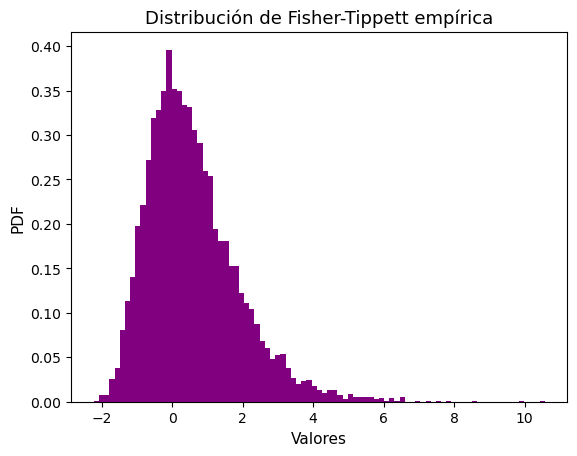

In [6]:
y = np.random.random(10000)
g = icdf(y)
plt.hist(g, bins='auto', color='purple', density=True)
plt.title('Distribución de Fisher-Tippett empírica',fontsize = 13)
plt.xlabel('Valores',fontsize = 11)
plt.ylabel('PDF',fontsize = 11)
plt.savefig("distribución_ft.pdf")
plt.show()



Para testear la función se puede calcular la media de los números generados y compararla con el valor de expectación de la distribución de Fisher-Tippett, el cual es E(F) = 0.57721/λ.

In [7]:
def E(lam):
    j = 0.57721/lam
    return(j)

media_simulada = np.mean(g)
media_esperada = E(1)
diferencia = abs(media_simulada - media_esperada)

print("Media simulada:", media_simulada)
print("Media esperada:", media_esperada)    
print("Diferencia absoluta:", diferencia)


Media simulada: 0.577344951265468
Media esperada: 0.57721
Diferencia absoluta: 0.0001349512654680307


### Método de la transformada inversa: distribución de Poisson

Se simula la ocurrencia de eventos en un proceso de Poisson de tasa λ = 5/h, hasta un tiempo T=3h, donde los tiempos entre eventos siguen una distribución exponencial. Se utiliza el método de la función inversa para generar los valores de los saltos.

In [8]:
import random

def poisson(lam=5, n=100):
    t = 0                                   # Tiempo acumulado de llegada de eventos.
    x = 0                                   # Tiempo entre eventos. 
    eventos = []                            # Se definen las listas donde se guardaran los resultados
    tel = []                                # Se guardan los tiempos entre llegadas
    Nev = []                                # Se guardan los tiempos absolutos de llegada de los eventos          

    for i in range(n):                          
        n = random.random()                 # Se genera un número aleatorio entre 0 y 1         
        x = -np.log(1-n)/lam                 
        tel.append(x)                       # Agrega el tiempo entre eventos x a la lista tel
        t = t + x                           # Se agrega el tiempo entre eventos a la suma acumulada para 
                                            #   obtener el siguiente tiempo absoluto del evento

        if t <= 3:                          # Se aplica la condición dada como límite temporal y se guardan los resultados     
            Nev.append(t)
            eventos.append(i)
        else:
             break

    return(eventos, tel, Nev)
# Devuelve tres listas: eventos → índices de los eventos dentro del tiempo máximo.
#                       tel → tiempos entre eventos consecutivos.
#                       Nev → tiempos absolutos de los eventos.


[19, 10, 16, 22, 12, 20, 15, 23, 15, 15, 16, 17, 8, 18, 14, 22, 14, 19, 21, 13, 17, 15, 20, 12, 17, 13, 21, 12, 15, 14, 17, 14, 19, 14, 21, 19, 13, 21, 13, 16, 19, 18, 16, 12, 18, 15, 14, 10, 14, 11, 14, 18, 14, 22, 15, 19, 10, 19, 16, 14, 10, 13, 19, 12, 15, 13, 14, 12, 11, 19, 11, 14, 21, 15, 13, 19, 13, 11, 16, 20, 18, 17, 11, 15, 20, 18, 12, 12, 9, 9, 19, 17, 13, 15, 11, 15, 18, 23, 19, 10, 17, 11, 10, 19, 18, 19, 12, 17, 21, 14, 16, 18, 15, 12, 14, 14, 9, 12, 18, 13, 14, 12, 19, 13, 19, 7, 17, 13, 19, 6, 11, 12, 20, 15, 12, 15, 16, 9, 20, 21, 17, 14, 12, 24, 17, 16, 23, 11, 16, 21, 14, 15, 17, 14, 13, 12, 14, 16, 9, 18, 17, 9, 16, 18, 11, 18, 12, 17, 16, 21, 12, 12, 14, 15, 9, 16, 18, 12, 11, 19, 23, 13, 18, 18, 17, 14, 19, 14, 17, 11, 9, 11, 16, 18, 12, 15, 21, 22, 17, 8, 14, 17, 16, 13, 12, 9, 16, 16, 15, 19, 9, 15, 19, 9, 10, 16, 15, 10, 10, 12, 14, 16, 17, 13, 13, 16, 21, 13, 21, 16, 19, 19, 16, 20, 21, 18, 18, 15, 13, 13, 15, 12, 13, 14, 19, 12, 7, 19, 15, 16, 11, 12, 14, 12,

[13, 17, 19, 18, 21, 14, 12, 10, 18, 4, 26, 12, 24, 12, 14, 17, 14, 13, 15, 12, 13, 18, 17, 16, 24, 19, 19, 15, 21, 10, 16, 10, 17, 15, 17, 12, 9, 17, 17, 13, 12, 11, 12, 11, 12, 17, 19, 13, 10, 15, 14, 12, 17, 14, 21, 15, 16, 9, 15, 11, 14, 19, 14, 23, 13, 18, 19, 16, 13, 11, 18, 10, 17, 23, 15, 20, 9, 15, 12, 20, 17, 9, 13, 15, 22, 14, 18, 18, 16, 10, 10, 17, 13, 13, 12, 23, 11, 12, 15, 13, 12, 9, 11, 16, 16, 13, 25, 17, 18, 12, 16, 7, 17, 22, 15, 9, 18, 12, 17, 18, 19, 24, 15, 14, 16, 20, 12, 16, 13, 15, 20, 13, 21, 6, 17, 16, 14, 15, 16, 14, 21, 13, 9, 16, 15, 17, 16, 15, 12, 11, 21, 11, 16, 18, 12, 18, 15, 11, 12, 22, 13, 16, 18, 13, 11, 15, 10, 15, 19, 24, 8, 17, 12, 16, 15, 11, 17, 17, 9, 17, 14, 20, 10, 20, 13, 11, 11, 18, 15, 13, 18, 15, 11, 14, 11, 17, 18, 17, 12, 16, 12, 17, 9, 14, 19, 13, 18, 17, 13, 17, 9, 18, 16, 12, 18, 19, 12, 20, 14, 20, 16, 16, 12, 18, 10, 13, 11, 11, 9, 11, 20, 14, 19, 16, 9, 18, 13, 13, 13, 16, 12, 16, 12, 12, 15, 12, 14, 14, 13, 12, 13, 17, 14, 21,

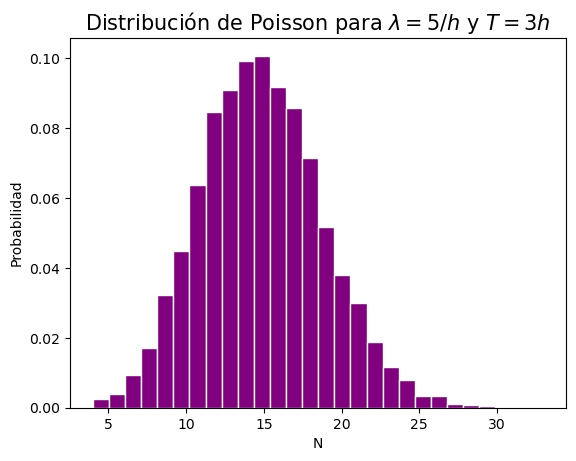

In [9]:
# se realizan 10,000 simulaciones del proceso de Poisson.

lista_N = []
for j in range(10000):
    x, y, z = poisson()
    N = len(z)
    lista_N.append(N)
    
print(lista_N)


plt.figure()
plt.title(r'Distribución de Poisson para $\lambda = 5/h$ y $T=3h$', fontsize = 15)
plt.hist(lista_N, bins=28, color = 'purple', density=True, edgecolor = "white")
plt.xlabel('N')
plt.ylabel('Probabilidad')
plt.savefig("distribución_poisson.pdf")
plt.show()


### Experimento de Buffon

Suponga que tiene una mesa con rayas paralelas y equiespaciadas, separadas por una distancia t.
Se lanza una aguja de longitud l (l < t) sobre la mesa, que cae en una ubicación aleatoria (uniforme) sobre la mesa, a una
distancia x de la raya máas cercana (medida desde el centro de la aguja) y con una orientación también
aleatoria θ dada por el ́angulo agudo que forma con la dirección de las rayas.

Este procedimiento se puede usar para estimar el n ́umero π. Para ello escriba un programa que
simule arrojar una aguja y determine si cruza alguna raya de un patrón dado de rayas paralelas.
Luego utilice la probabilidad clásica para estimar π a partir de muchas realizaciones del experimento.
Este procedimiento es parte de lo que se conoce como métodos de MonteCarlo.

In [10]:
t = 20
l = 10
n = 10000000

# Posición del centro de la aguja respecto a la línea más cercana
x = np.random.random(n) * (t / 2)

# Ángulo aleatorio entre 0 y pi/2
theta = np.random.random(n) * (np.pi / 2)

# ¿Cruza la línea? 
cruza = x <= (l / 2) * np.sin(theta)

# Estimación de pi
pi_estimado = (2 * l * n) / (t * np.sum(cruza))
print("Estimación de pi:", pi_estimado)

Estimación de pi: 3.142549173038185


### Remuestreo Bootstrap

Se diseña una función que estima la varianza de una V.A. a partir de una muestra
de datos. A continuación, se implementa una función que utiliza boostrap resampling para calcular los
intervalos de confidencia del estimador de la varianza con un nivel de significancia dado α.

La varianza de la muestra es: 1.4976001895957824
La media de la muestra es: 2.077836148163671
2


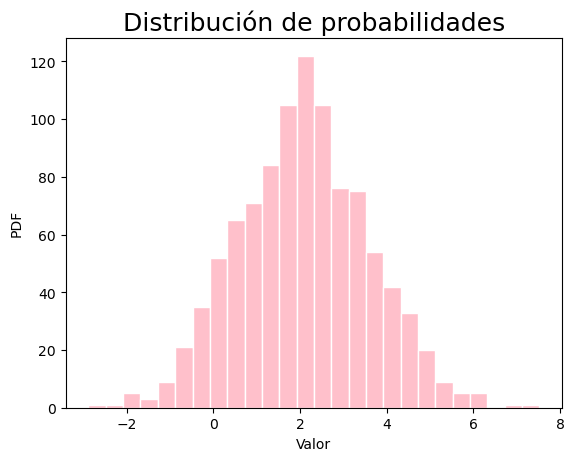

In [6]:
n = 1000
sigma = 1.5
mean = 2
muestra = np.random.normal(loc=mean, scale=sigma, size=n) #array de 1000 números.
mean_ = np.mean(muestra)
h = []
for i in range(n): 
    t = (muestra[i]-mean_)**2
    h.append(t)
s = np.sqrt((np.sum(h))/n)

print('La varianza de la muestra es:', s)
print('La media de la muestra es:', mean_)
print(mean)

plt.hist(muestra, bins='auto', color='pink', edgecolor='white')
plt.title('Distribución de probabilidades',fontsize = 18)
plt.xlabel('Valor')
plt.ylabel('PDF')
plt.savefig("distribución_normal.pdf")
plt.show()

In [7]:
def bootstrap(x, func, m=1000):
    y = np.zeros(m) #crea un array de ceros que guardará los resultados de cada iteración.
    for i in range(m):
        _x = np.random.choice(x, size = len(x), replace=True) #Toma una nueva muestra de los datos con remuestreo con reemplazo 
        y[i] = func(_x) #calcula el estadístico en esa muestra bootstrap
    return y

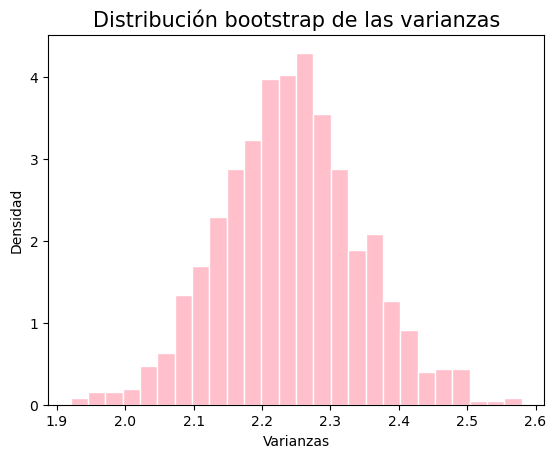

2.241378120909642 0.10102346959568892


In [13]:
boot_s = bootstrap(muestra, np.var) #array con las varianzas calculadas en cada remuestreo bootstrap.
plt.hist(boot_s, bins = 'auto', color = "pink", edgecolor="white", density=True)
plt.title('Distribución bootstrap de las varianzas',fontsize = 15)
plt.xlabel('Varianzas',fontsize = 10)
plt.ylabel('Densidad',fontsize = 10)
#plt.savefig("bootstrap_varianzas.pdf")
plt.show()
print(boot_s.mean(),boot_s.std())

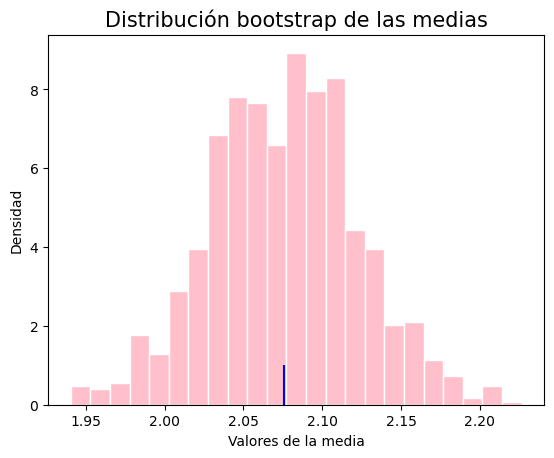

2.0758475315576024 0.04702947808756786


In [14]:
m = 1000
boot_m = bootstrap(muestra, np.mean , m=m) 


plt.hist(boot_m, density= True, bins="auto", color = "pink", edgecolor="white",)
plt.vlines(boot_m.mean(),0,1,color="blue")
plt.title('Distribución bootstrap de las medias',fontsize = 15)
plt.xlabel('Valores de la media',fontsize = 10)
plt.ylabel('Densidad',fontsize = 10)
#plt.savefig("bootstrap_media.pdf")
plt.show()
print(boot_m.mean(),boot_m.std())

In [15]:
alpha = 0.05  # nivel de significancia
IC_inf = np.percentile(boot_s, 100*(alpha/2))
IC_sup = np.percentile(boot_s, 100*(1-alpha/2))

print(f"Intervalo de confianza 95% para la varianza: [{IC_inf:.3f}, {IC_sup:.3f}]")

Intervalo de confianza 95% para la varianza: [2.043, 2.454]


Se aplica la función a una muestra de 1000 datos generados aleatoriamente a partir de una distribución
de Fisher-Tippett con λ = 1. Compare el resultado con el valor teórico de la varianza de la distribución,
que es $\sigma² = \pi²/6$.
Se analiza el efecto del tamaño de la muestra en la estimación de la varianza y en los intervalos de confianza.

Varianza estimada de la muestra: 1.7447742299145226
Varianza teórica: 1.6449340668482264


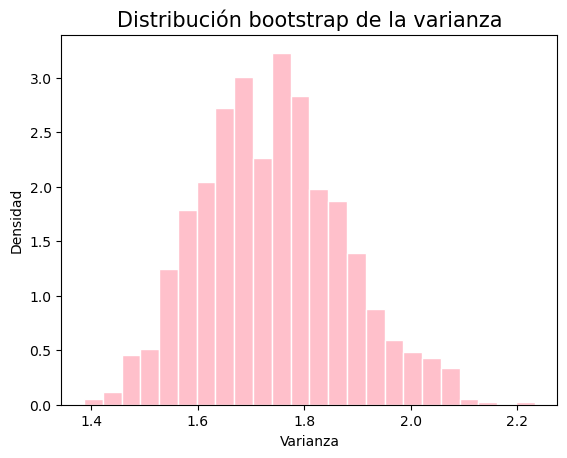

Intervalo de confianza 95% para la varianza: [1.501, 2.033]

Tamaño n=100
Varianza estimada: 1.990
Intervalo de confianza 95%: [1.319, 2.788]

Tamaño n=500
Varianza estimada: 1.862
Intervalo de confianza 95%: [1.461, 2.287]

Tamaño n=1000
Varianza estimada: 1.578
Intervalo de confianza 95%: [1.411, 1.743]

Tamaño n=5000
Varianza estimada: 1.628
Intervalo de confianza 95%: [1.526, 1.719]


In [18]:
def t(x,lam=1, mu=0): 
    return np.exp(-(x-mu)*lam)

def pdf(x, lam=1): 
    return lam*t(x)*np.exp(-t(x))

def cdf(x, lam=1): 
    return np.exp(-t(x))

def icdf(y, lam=1): 
    return -(1/lam)*np.log(-np.log(y))

#Genero la muestar Fisher-Tippett
n = 1000
lam = 1
y = np.random.random(n)
muestra_ft = icdf(y, lam=lam) #esto es todo lo mismo q antes



# Función para varianza muestral
def var_muestral(x):
    n = len(x)
    media = np.mean(x)
    return np.sum((x - media)**2)/(n-1)

var_estimada = var_muestral(muestra_ft)
print("Varianza estimada de la muestra:", var_estimada)

# Valor teórico de la varianza de Fisher-Tippett
sigma2_teorica = np.pi**2 / 6
print("Varianza teórica:", sigma2_teorica)

# Pongo de nuevo la función bootstrap
def bootstrap(x, func, m=1000):
    y = np.zeros(m)
    for i in range(m):
        _x = np.random.choice(x, size=len(x), replace=True)
        y[i] = func(_x)
    return y

# Bootstrap para varianza
boot_var = bootstrap(muestra_ft, var_muestral, m=1000)

plt.hist(boot_var, bins='auto', color="pink", edgecolor="white", density=True)
plt.title('Distribución bootstrap de la varianza', fontsize=15)
plt.xlabel('Varianza')
plt.ylabel('Densidad')
plt.savefig("bootstrap_varianza_ft.pdf")
plt.show()

# Intervalos de confianza 
alpha = 0.05
IC_inf = np.percentile(boot_var, 100*(alpha/2))
IC_sup = np.percentile(boot_var, 100*(1-alpha/2))
print(f"Intervalo de confianza 95% para la varianza: [{IC_inf:.3f}, {IC_sup:.3f}]")

# Efecto del tamaño de la muestra
tamanos = [100, 500, 1000, 5000]
for n in tamanos:
    y = np.random.random(n)
    muestra_ft = icdf(y, lam=lam)
    var_est = var_muestral(muestra_ft)
    boot_var = bootstrap(muestra_ft, var_muestral, m=1000)
    IC = (np.percentile(boot_var, 2.5), np.percentile(boot_var, 97.5))
    print(f"\nTamaño n={n}")
    print(f"Varianza estimada: {var_est:.3f}")
    print(f"Intervalo de confianza 95%: [{IC[0]:.3f}, {IC[1]:.3f}]")


### Test de chi–cuadrado

Diseñe, implemente y verifique una función que calcule el test de “chi-cuadrado” para comparar un
histograma H1 con un modelo dado por una distribución Binomial, f(x) ∼ B(n = 10, p = 0.4).

Para ello, realice los siguientes puntos:

(a) Simule 100 observaciones de la V.A. binomial y calcule las frecuencias de cada valor.

In [20]:
n = 10
p = 0.4
N = 100 

muestras = np.random.binomial(n, p, N)
print(muestras)

valores, frecuencias_obs = np.unique(muestras, return_counts=True) #devuelve los valores distintos que hay en el arreglo muestras
                                                                #ordenados de menor a mayor, tambien dice cuántas veces aparece c/u                                                             
for v, f in zip(valores, frecuencias_obs): #crea pares (valor, frecuencia) para cada valor distinto
    print(f"X = {v}, frecuencia observada = {f}") 

[4 5 4 3 6 5 4 2 6 5 2 2 4 4 8 1 3 5 5 6 5 2 4 3 3 5 5 3 5 7 3 4 4 3 4 3 4
 4 3 5 2 2 3 6 4 2 5 2 4 5 7 7 4 4 3 4 4 4 6 3 3 5 5 3 6 7 3 5 6 4 5 4 5 3
 3 4 4 4 2 6 3 4 3 7 3 3 4 6 3 4 2 5 6 1 6 6 3 5 4 4]
X = 1, frecuencia observada = 2
X = 2, frecuencia observada = 10
X = 3, frecuencia observada = 23
X = 4, frecuencia observada = 28
X = 5, frecuencia observada = 19
X = 6, frecuencia observada = 12
X = 7, frecuencia observada = 5
X = 8, frecuencia observada = 1


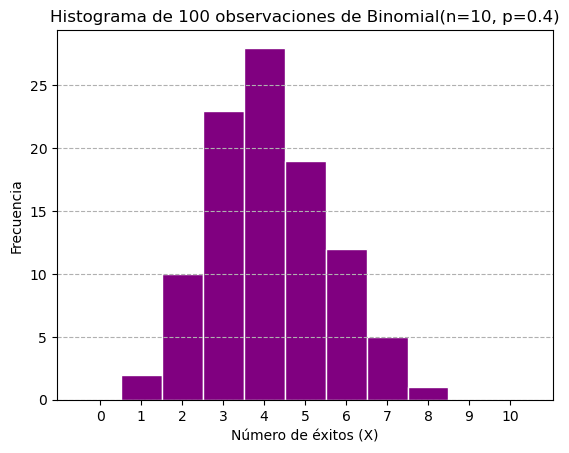

In [22]:
plt.hist(muestras, bins=np.arange(-0.5, n+1.5, 1), color="purple", edgecolor="white")
plt.xlabel("Número de éxitos (X)")
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {N} observaciones de Binomial(n={n}, p={p})")
plt.xticks(range(0, n+1))
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.savefig("histograma_binomial.pdf")
plt.show()

(b) Calcule el estadístico $χ^2$ a partir del modelo y de los datos simulados.

In [24]:
# Probability mass function de la binomial.
# Devuelve la probabilidad teórica de que una variable aleatoria X∼Binomial(n,p) tome el valor k.
frecuencias_teoricas = N * binom.pmf(valores, n, p) 

chi2_stat = np.sum((frecuencias_obs - frecuencias_teoricas)**2 / frecuencias_teoricas)

for v, f_obs, f_teo in zip(valores, frecuencias_obs, frecuencias_teoricas):
    print(f"X={v}: observada={f_obs}, teórica={f_teo:.2f}")

print(f"\nEstadístico chi-cuadrado: χ² = {chi2_stat:.2f}")


X=1: observada=2, teórica=4.03
X=2: observada=10, teórica=12.09
X=3: observada=23, teórica=21.50
X=4: observada=28, teórica=25.08
X=5: observada=19, teórica=20.07
X=6: observada=12, teórica=11.15
X=7: observada=5, teórica=4.25
X=8: observada=1, teórica=1.06

Estadístico chi-cuadrado: χ² = 2.09


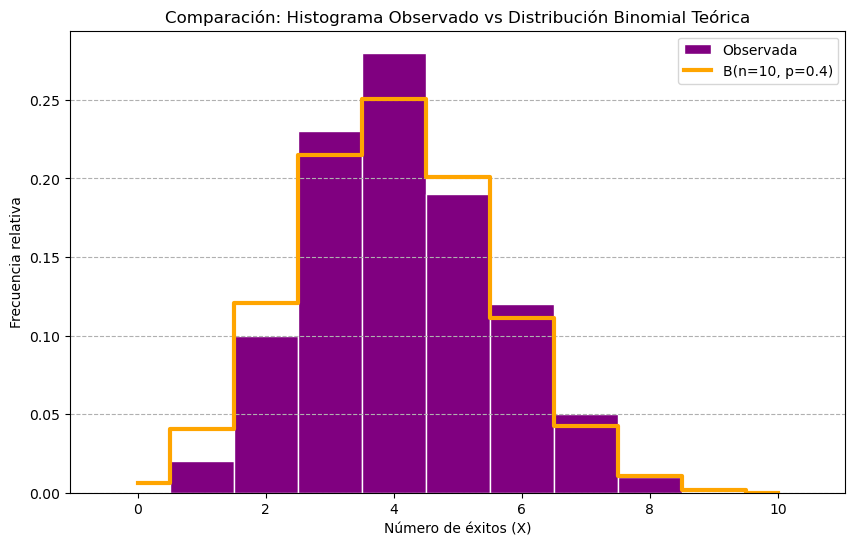

In [25]:
# Valores posibles de X
x = np.arange(0, n+1)

# Probabilidad teórica de cada X
y = binom.pmf(x, n, p)

# Gráfico
plt.figure(figsize=(10,6))

# Histograma de datos simulados (normalizado para que sea comparable con la pmf)
plt.hist(muestras, bins=np.arange(-0.5, n+1.5, 1), color='purple', edgecolor='white', density=True, label='Observada')

# Línea escalonada de la distribución teórica
plt.step(x, y, where='mid', lw=3, c='orange', label=f"B(n={n}, p={p})")

# Etiquetas y leyenda
plt.xlabel("Número de éxitos (X)")
plt.ylabel("Frecuencia relativa")
plt.title("Comparación: Histograma Observado vs Distribución Binomial Teórica")
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.savefig("comparacion_binomial.pdf")
plt.show()

(c) Realice una prueba de hipótesis completa para decidir si los datos están en acuerdo con el modelo.

(d) Calcule el valor-p de la prueba.

In [26]:
from scipy.stats import chi2
#
# (c) Prueba de hipótesis completa
grados_libertad = len(valores) - 1  # categorías - 1
nivel_confianza = 0.05
chi2_critico = chi2.ppf(1 - nivel_confianza, grados_libertad)

print(f"\nGrados de libertad: {grados_libertad}")
print(f"Valor crítico χ² al {100*(1-nivel_confianza)}%: {chi2_critico:.2f}")

if chi2_stat < chi2_critico:
    print("No se rechaza H0: los datos están en acuerdo con la distribución binomial.")
else:
    print("Se rechaza H0: los datos no están en acuerdo con la distribución binomial.")


valor_p = chi2.sf(chi2_stat, grados_libertad)
print(f"Valor-p de la prueba: {valor_p:.4f}")


Grados de libertad: 7
Valor crítico χ² al 95.0%: 14.07
No se rechaza H0: los datos están en acuerdo con la distribución binomial.
Valor-p de la prueba: 0.9548


(e) Simule muestras de 100 observaciones de una V.A. N(μ, σ), con σ=2.5 y μ que varíe entre 2 y 7. Estudie cómo varía el valor-p y determine si en algún rango de μ se puede “confundir” el modelo.


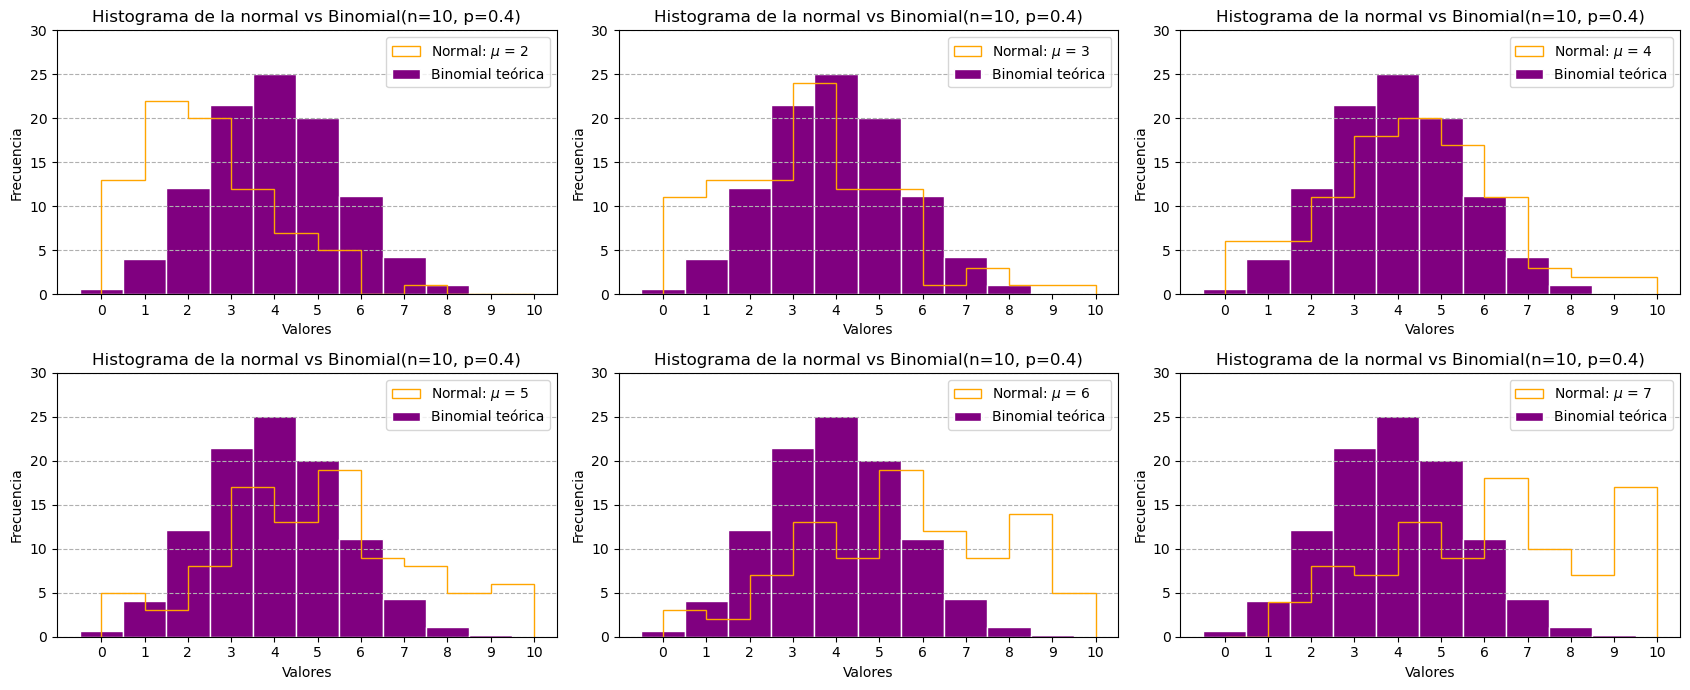

In [31]:
def muestra_normal(n, mu, sigma=2.5):
    return sp.norm.rvs(loc=mu, scale=sigma, size=n)


f_binomial_teo =  sp.binom.pmf(k=np.arange(10), n=10, p=0.4)  #probabilidades teóricas de la binomial

fb = f_binomial_teo* 100 #frecuencias esperadas en una muestra de tamaño 100.

frecuencias=[]
plt.figure(figsize=(17,7))

for i in [1,2,3,4,5,6]:  
    plt.subplot(2,3,i)   # Crea una grilla de subplots de 2 filas y 3 columnas (2x3).
    plt.bar(np.arange(10), fb, width=1, color='purple', edgecolor="white", label='Binomial teórica') #Dibuja un histograma de barrasde las frecuencias teóricas de la binomial (fb3).
    h=plt.hist(muestra_normal(100,i+1), bins=np.arange(0.0,10.2,1), histtype='step', color="orange", label=r'Normal: $\mu$ = '+ str(i+1))
    plt.legend(loc='best')
    plt.title('Histograma de la normal vs Binomial(n=10, p=0.4)')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', linewidth=0.8)
    plt.xticks(range(0, 11))
    plt.yticks(range(0, 35, 5))
    plt.ylim(0, 30)
    plt.tight_layout()
    plt.savefig("normal_vs_binomial.pdf")
    frecuencias.append(h[0]) #Guarda solo las frecuencias observadas del histograma de la normal en la lista frecuencias.


In [32]:
# cálculo de chi-cuadrado y valor-p 
for k, f_obs in enumerate(frecuencias):
    chi2 = np.sum((f_obs - fb)**2 / fb)  # estadístico chi-cuadrado
    p = 1 - sp.chi2.cdf(chi2, df=len(fb)-1)  # valor-p con df = 10-1=9
    print(f"μ = {k+2}, chi2 = {chi2:.2f}, valor-p = {p:.30f}")

    alpha = 0.05
gl = len(fb) - 1  # grados de libertad
chi2_c = sp.chi2.ppf(1 - alpha, df=gl)  # valor crítico

for k, f_obs in enumerate(frecuencias):
    chi2_stat = np.sum((f_obs - fb)**2 / fb)
    p_value = 1 - sp.chi2.cdf(chi2_stat, df=gl)
    
    decision = "Rechazo H0" if chi2_stat > chi2_c else "No rechazo H0"
    print(f"μ = {k+2}, χ² = {chi2_stat:.2f}, χ²_c = {chi2_c:.2f}, p = {p_value:.4f}, decisión: {decision}")


μ = 2, chi2 = 382.76, valor-p = 0.000000000000000000000000000000
μ = 3, chi2 = 223.22, valor-p = 0.000000000000000000000000000000
μ = 4, chi2 = 74.06, valor-p = 0.000000000002426503442620742135
μ = 5, chi2 = 275.80, valor-p = 0.000000000000000000000000000000
μ = 6, chi2 = 338.55, valor-p = 0.000000000000000000000000000000
μ = 7, chi2 = 1872.48, valor-p = 0.000000000000000000000000000000
μ = 2, χ² = 382.76, χ²_c = 16.92, p = 0.0000, decisión: Rechazo H0
μ = 3, χ² = 223.22, χ²_c = 16.92, p = 0.0000, decisión: Rechazo H0
μ = 4, χ² = 74.06, χ²_c = 16.92, p = 0.0000, decisión: Rechazo H0
μ = 5, χ² = 275.80, χ²_c = 16.92, p = 0.0000, decisión: Rechazo H0
μ = 6, χ² = 338.55, χ²_c = 16.92, p = 0.0000, decisión: Rechazo H0
μ = 7, χ² = 1872.48, χ²_c = 16.92, p = 0.0000, decisión: Rechazo H0
